# Tarea Programada 3

**Profesora**: María Auxiliadora Mora

**Estudiante**: Marco Ferraro

## Introducción

En esta tarea se aplicarán conceptos básicos de aprendizaje automático utilizando redes neuronales convolucionales (CNN) y afinamiento de modelos de pre-entrenados para resolver problemas que involucran clasificación de imágenes. Las y los estudiantes deberán completar los ejercicio utilizando alguno de los conjuntos de datos propuestos al final del documento.

El objetivo del trabajo es poner en práctica las habilidades de investigación y el conocimiento adquirido durante el curso sobre aprendizaje profundo por medio de ejercicios prácticos que permitan a las y los estudiantes experimentar con algoritmos de aprendizaje
automático.

Para resolver el ejercicio se debe utilizar la biblioteca PyTorch, de no ser así, el ejercicio no
aportará al cálculo de la nota de la tarea.

## 1 Redes Convolusionales

Las redes convolucionales son una arquitectura de aprendizaje profundo para tareas de visión por computadora, que utilizan filtros para extraer características relevantes de imágenes.

Las CNNs son eficientes y generalizan bien en diferentes tareas visuales debido a su uso de parámetros compartidos y operaciones de agrupación. La transferencia de aprendizaje también mejora su rendimiento en nuevas tareas. Estas redes han revolucionado la visión por computadora y son fundamentales en inteligencia artificial.

### 1.1 Descripción del Problema y Objetivos

### 1.2 Selección del Conjunto de Datos

### 1.3 Exploración de Datos

In [8]:
import os
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

data_folder = './data'
emotions_folders = ["Angry", "Happy", "Sad"]
X = []
y = []
# Setting image to this size
image_size = (128, 128)

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
])


for idx, emotion in enumerate(emotions_folders):
    emotion_folder = os.path.join(data_folder, emotion)
    for image_file in os.listdir(emotion_folder):
        image_path = os.path.join(emotion_folder, image_file)
        try:
            image = Image.open(image_path).convert("RGB")
            image_tensor = transform(image)
            X.append(image_tensor)
            y.append(idx)  
        except Exception as e:
            print(f"Error loading image: {image_path}. Error: {e}")

X = torch.stack(X)
y = torch.tensor(y)


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: torch.Size([265, 3, 128, 128])
Shape of y: torch.Size([265])


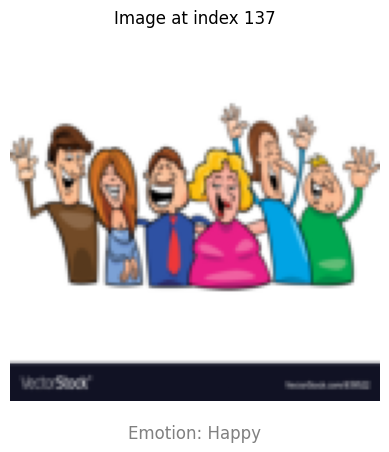

In [19]:
random_idx = random.randint(0, X.shape[0] - 1)
emotion_idx = y[random_idx].item()

image_tensor = X[random_idx]

image_np = image_tensor.permute(1, 2, 0).numpy()

plt.imshow(image_np)
plt.title(f"Image at index {random_idx}")
plt.axis('off')
plt.text(0.5, -0.1, f"Emotion: {emotions_folders[emotion_idx]}", transform=plt.gca().transAxes, ha='center', fontsize=12, color='gray')
plt.show()